##### Decision Tree Regression

##### Dataset

Download `petrol_consumption.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the dataset

In [5]:
df = pd.read_csv('datasets/petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


##### Separate the input and output variables

In [10]:
# input data
x = df.drop('Petrol_Consumption', axis=1)

# output data
y = df['Petrol_Consumption']

In [11]:
x.shape, y.shape

((48, 4), (48,))

In [12]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

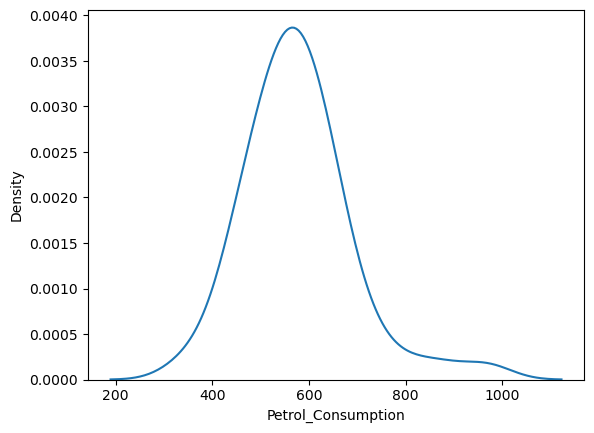

In [14]:
sns.kdeplot(y)

##### Cross-Validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36, 4), (12, 4), (36,), (12,))

##### Build the model

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regressor = DecisionTreeRegressor(random_state=0)

In [20]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

Plot the tree

In [21]:
from sklearn.tree import plot_tree

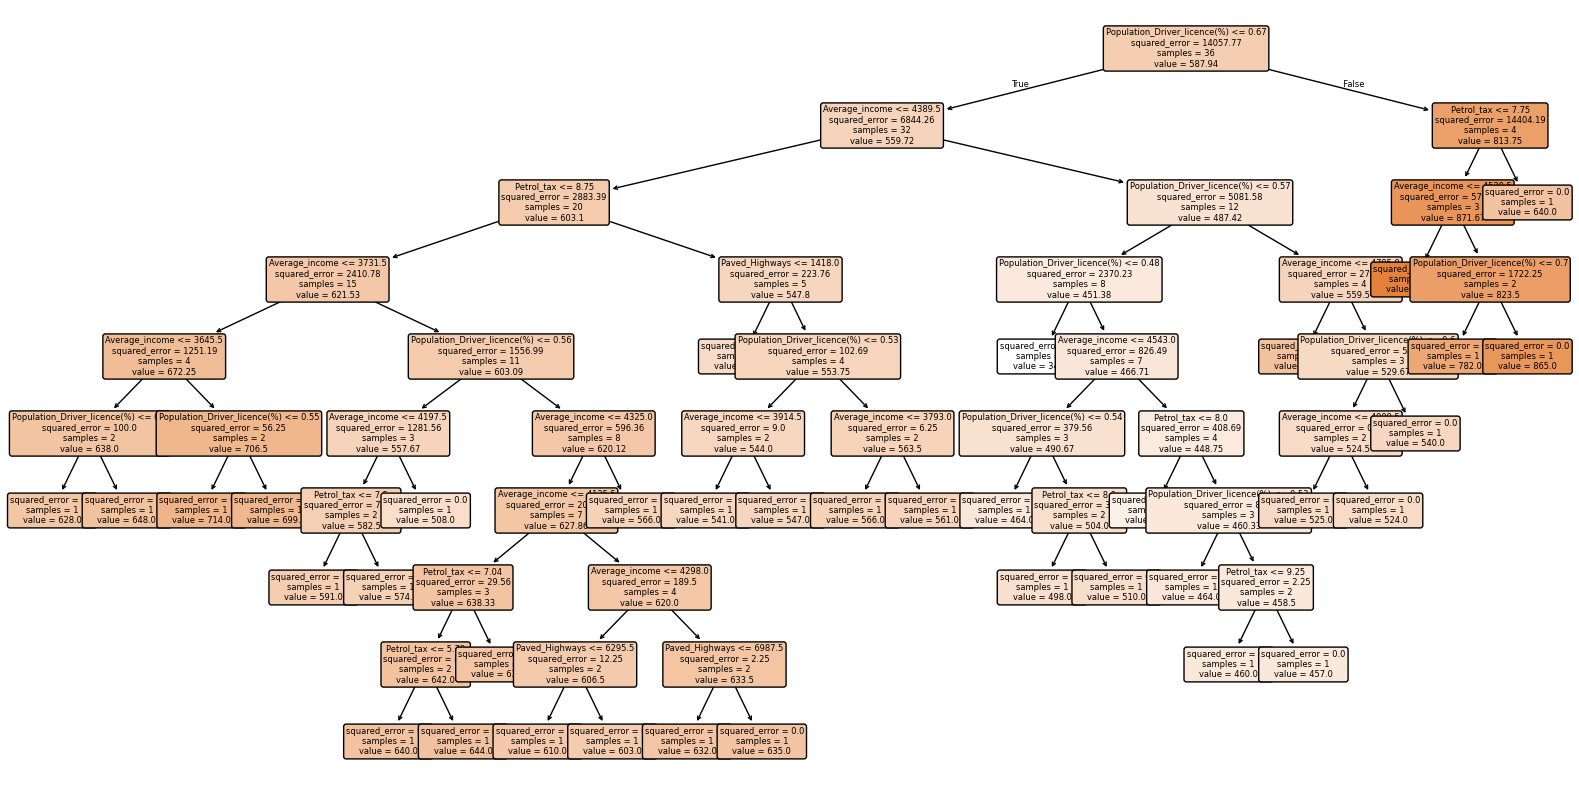

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(regressor, fontsize=6, feature_names=x.columns, filled=True, rounded=True, precision=2); 

##### Preformance Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [33]:
y_pred = regressor.predict(x_test)

In [34]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [43]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [47]:
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

In [49]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

75.58604368532593

##### Predict on unseen data

In [53]:
ndf = pd.DataFrame(data=[[5.00, 4045, 17782, 0.566],
                         [7.00, 4700, 3435, 0.603],
                         [6.5, 4816, 5915, 0.624]], columns=x.columns)
ndf

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,5.0,4045,17782,0.566
1,7.0,4700,3435,0.603
2,6.5,4816,5915,0.624


In [54]:
regressor.predict(ndf)

array([640., 649., 540.])